In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Details
This dataset was taken from the kaggle [here](https://www.kaggle.com/thammuio/all-agriculture-related-datasets-for-india). The aim of this project is to do the analysis and extract some information about the agriculture in India.

Columns:
- state: Name of states
- ditrict: Name of district in the coressponding state
- market: Name of market where they sell there crops
- commodity: The crop they grow
- variety: The variety of the commodity
- arrival_date: Arrival date in the market
- min_price: Minimum price of the product
- max_price: Maximum price of the product
- modal_price: Modal prices are average market prices for a particular commodity over a two-month period

These informations are not given on the kaggle, I have assumed from seeing the dataset.

In [2]:
data = pd.read_csv('../input/all-agriculture-related-datasets-for-india/csv')

In [3]:
data.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         2238 non-null   object
 1   district      2238 non-null   object
 2   market        2238 non-null   object
 3   commodity     2238 non-null   object
 4   variety       2238 non-null   object
 5   arrival_date  2238 non-null   object
 6   min_price     2238 non-null   int64 
 7   max_price     2238 non-null   int64 
 8   modal_price   2238 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 157.5+ KB


So, above we can see that no any null values. Let's see each of the columns individually to check the need of data cleaning.

In [5]:
# state
data.state.value_counts().index

Index(['Uttar Pradesh', 'Kerala', 'Tamil Nadu', 'Punjab', 'West Bengal',
       'Maharashtra', 'Gujarat', 'Himachal Pradesh', 'Odisha', 'Haryana',
       'Assam', 'Manipur', 'Madhya Pradesh', 'Rajasthan', 'Karnataka',
       'Uttrakhand', 'Tripura', 'Telangana', 'Andaman and Nicobar',
       'Pondicherry', 'Andhra Pradesh', 'Meghalaya', 'Nagaland', 'Chattisgarh',
       'Goa', 'Jammu and Kashmir'],
      dtype='object')

This state column consist of 3 union teritories (Jammu & Kashmir, Andaman & Nicobar, Pondicherry) and other 23 are the states of India.  

In [8]:
# district
print(len(data.district.value_counts().index))
data.district.value_counts().head(10)

174


Agra             123
Pune              89
Saharanpur        79
Kangra            75
Thirssur          71
Villupuram        67
Burdwan           57
Muzaffarnagar     49
Kasargod          41
Kollam            38
Name: district, dtype: int64

In [9]:
data.arrival_date.value_counts()

04/03/2019    2238
Name: arrival_date, dtype: int64

It consists of total 174 different `district` which is difficult to verify each one of them. However this data consists a single arrival date which is odd because this dataset consists of more than 150 commodities or they have same arrival date in market. May be my assumption about the `arrival_date` column is wrong.

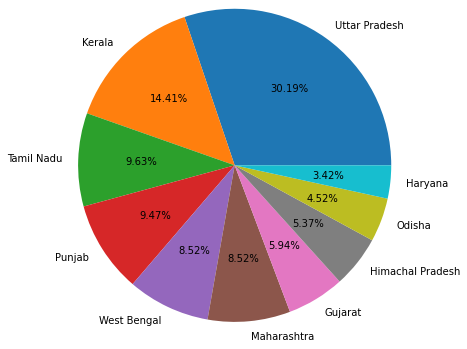

In [10]:
# Which state most involve in the ariculture?
plt.pie(data.state.value_counts().to_list()[:10], labels=data.state.value_counts().index[:10], radius=1.8, autopct="%0.2f%%")
plt.show()

Let's see the distict of the most crops production state according to this data.

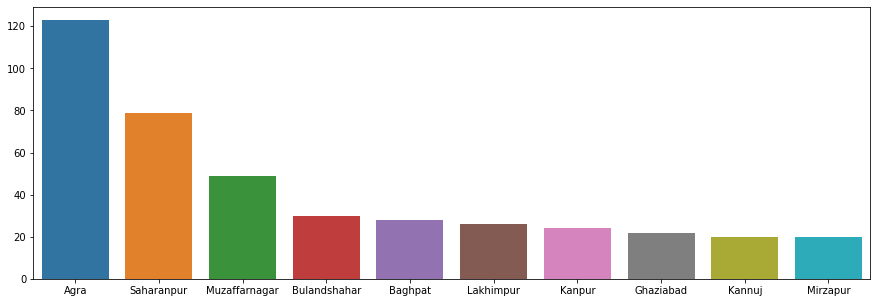

In [11]:
values = data[data.state == 'Uttar Pradesh'].district.value_counts().to_list()[:10]
labels = data[data.state == 'Uttar Pradesh'].district.value_counts().index[:10]

plt.figure(figsize=(15, 5))
# plt.bar(labels, values)
sns.barplot(x=labels, y=values)
plt.show()

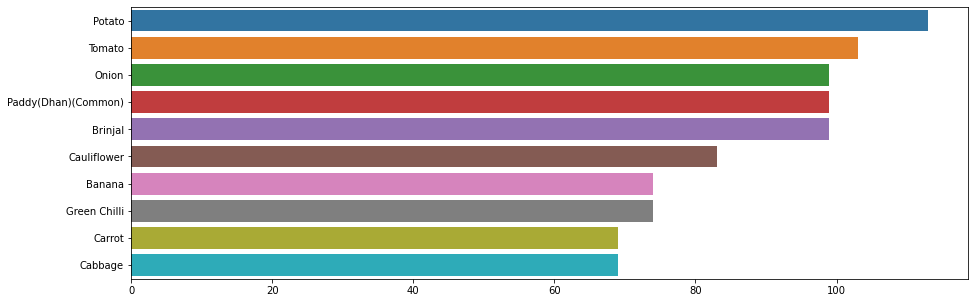

In [12]:
# Which commodity is produced in large amount?
values = data.commodity.value_counts().to_list()[:10]
labels = data.commodity.value_counts().index[:10]

plt.figure(figsize=(15,5))
# plt.barh(labels, values)
sns.barplot(x=values, y=labels)
plt.show()

If this dataset contains about the location (long and lat) of the agriculture field and the climate of the area then this is gonna be awesome visualization using `Plotly` and `Dash` visualization tools.